## Martin Dionne

# Notes:

You are banned from using loops (`for` or `while` or any other) for this entire workshop!

You shouldn't be using loops almost ever with pandas in any case, so break out of the habit now.

## 1. DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

**2.** Select only the rows where visits are 3 or more. Which types of animals are these?

**3.** Select the rows where visists are 3 and the animal is a cat

**4.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

**5.** Calculate the mean age for each different animal in `df`.

**6.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.



In [1]:
import pandas as pd
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [2]:
# 1. Create a DataFrame df from this dictionary data which has the index labels.
df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [3]:
# 2. Select only the rows where visits are 3 or more. Which types of animals are these?
df.loc[df.visits == 3] # cats & dog

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


In [4]:
# 3. Select the rows where visists are 3 and the animal is a cat
mask = (df.visits == 3) & (df.animal == 'cat')
df.loc[mask]

,animal,age,visits,priority
b,cat,3.0,3,yes
f,cat,2.0,3,no


In [5]:
# 4. Calculate the sum of all visits in df (i.e. the total number of visits).
df.visits.sum()

19

In [6]:
# 5. Calculate the mean age for each different animal in df.
df.groupby('animal').age.mean()

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

In [7]:
# 6. Append a new row 'k' to df with your choice of values for each column. 
#df = pd.DataFrame(data, index=labels)
data2 = {'animal': 'snake',
        'age': 3,
        'visits': 2,
        'priority': 'yes'}
labels2 = ['k']
df2 = pd.DataFrame(data2, index=labels2)
df = df.append(df2) # or concat
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [8]:
# Then delete that row to return the original DataFrame.
df = df.drop('k')
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


# 2.1 Shifty problem

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

### Hint: use the `shift()` method

In [9]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df['shifted'] = df.shift(periods=1, axis=0)
df = df.loc[df.A != df.shifted]
df = df.drop('shifted', axis=1)
df

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


# 2.2 columns sum min

Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? Return that column's label.

In [10]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
print(df.sum())
df.sum().idxmin()

a    2.276528
b    2.342372
c    1.607187
d    1.919883
e    2.901540
f    3.478756
g    3.792261
h    2.847201
i    1.981402
j    2.343931
dtype: float64


'c'

# 2.3 Duplicates

How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

**hint:** There's a method for to find duplicate rows for you

In [11]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
#df = df.drop_duplicates() 
df.duplicated().sum()

4

# 2.4 Group Values

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.  You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [12]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

df.groupby('grps').vals.nlargest(3).sum(level=0)

grps
a    409
b    156
c    345
Name: vals, dtype: int64

# 3. Cleaning Data

### Making a DataFrame easier to work with

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```

Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```

**1.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [13]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

In [14]:
df['shifted'] = df['FlightNumber'].shift(periods=1, axis=0)
df.FlightNumber[df.FlightNumber.isna()] = df['shifted'] + 10
df = df.drop('shifted', axis=1)
df.FlightNumber = df.FlightNumber.astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


# 3.2 column splitting

The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to make two new columns `From` and `To` to your dataframe.

In [15]:
df[['From','To']] = df.From_To.str.split("_",expand=True,)
df = df.drop('From_To', axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


# 3.3 Clean Text

Make the text in your dataframe:

- From and To columns should be lowercase with only first letter capitalized

- In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [16]:
df.From = df.From.str.capitalize()
df.To = df.To.str.capitalize()
df.Airline = df.Airline.str.replace('[^a-zA-Z\s]', '')
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


# Exercise 4.1: Column Splitting

Given the unemployment data in `data/country_total.csv`, split the `month` column into two new columns: a `year` column and a `month` column, both integers

In [17]:
df = pd.read_csv('data/country_total.csv')
df.month = round(df.month * 100).astype(int).astype(str)
df['year'] = df.month.str[:-2].astype(int)
df.month = df.month.str[-2:].astype(int)
df

,country,seasonality,month,unemployment,unemployment_rate,year
0,at,nsa,1,171000,4.5,1993
1,at,nsa,2,175000,4.6,1993
2,at,nsa,3,166000,4.4,1993
3,at,nsa,4,157000,4.1,1993
4,at,nsa,5,147000,3.9,1993
...,...,...,...,...,...,...
20791,uk,trend,6,2429000,7.7,2010
20792,uk,trend,7,2422000,7.7,2010
20793,uk,trend,8,2429000,7.7,2010
20794,uk,trend,9,2447000,7.8,2010


# 4.2 Group Statistics

Given the unemployment data in `data/country_sex_age.csv`, give the average unemployment rate for:

- Each gender
- Each Age Group
- Both Together

**HINT:** The `seasonality` column makes it such that the data is repeated for each method of calculating unemployment (`nsa`, `trend`, etc.). Can you ignore this and group over it? Or should you take the average for each?

In [18]:
df = pd.read_csv('data/country_sex_age.csv')
print(df.groupby('sex').unemployment_rate.mean())
print()
print(df.groupby('age_group').unemployment_rate.mean())
print()
print(df.groupby(['sex', 'age_group']).unemployment_rate.mean())
print()
print(print(df.groupby(['sex', 'age_group', 'seasonality']).unemployment_rate.mean()))
# the average being a little different, the seasonality souldn't be ignored

sex
f    12.982629
m    11.671026
Name: unemployment_rate, dtype: float64

age_group
y25-74     6.905394
y_lt25    17.774057
Name: unemployment_rate, dtype: float64

sex  age_group
f    y25-74        7.566771
     y_lt25       18.457435
m    y25-74        6.244016
     y_lt25       17.098036
Name: unemployment_rate, dtype: float64

sex  age_group  seasonality
f    y25-74     nsa             7.539839
                sa              7.579982
                trend           7.579934
     y_lt25     nsa            18.818593
                sa             18.323837
                trend          18.231025
m    y25-74     nsa             6.201653
                sa              6.256909
                trend           6.272703
     y_lt25     nsa            17.215211
                sa             17.067671
                trend          17.013327
Name: unemployment_rate, dtype: float64
None


# 4.3 Estimating group size

Given that we have the unemployment **rate** as a % of total population, and the number of total unemployed, we can estimate the total population.

Give an estimate of the total population for men and women in each age group.

Does this change depending on the unemployment seasonality calculation method?

In [19]:
df['tot_pop'] = df.unemployment / df.unemployment_rate * 100
print(df.groupby(['sex', 'age_group']).tot_pop.mean())
print()
print(df.groupby('seasonality').tot_pop.mean()) 
# yes, the unemployment depend on seasonality, therefore the total population estimate too

sex  age_group
f    y25-74       3.220602e+06
     y_lt25       5.665826e+05
m    y25-74       4.357668e+06
     y_lt25       6.679826e+05
Name: tot_pop, dtype: float64

seasonality
nsa      2.069865e+06
sa       2.298884e+06
trend    2.251533e+06
Name: tot_pop, dtype: float64


# 5.1 Tennis

In `data/tennis.csv` you have games that Roger Federer played against various opponents. Questions:

1. How many games did Federer win?

2. What is Federer's win/loss ratio?

3. Who were Federer's top 5 opponents?

In [20]:
df = pd.read_csv('data/tennis.csv')
print(df.win.sum()) # 972
print()
print(df.win.sum() / sum(df.win == False)) # 4.695
print()
print(df.loc[df.win == False].groupby('opponent').win.count().nlargest(5))

972

4.695652173913044

opponent
Rafael Nadal (ESP)        18
Novak Djokovic (SRB)      13
Andy Murray (GBR)         10
David Nalbandian (ARG)     8
Lleyton Hewitt (AUS)       8
Name: win, dtype: int64


# 5.2 Over time

1. What was Federer's best year? In terms of money, and then in terms of number of wins

2. Did Federer get better or worse over time?

In [21]:
#print(df.loc[df.win == False].groupby('opponent').win.count().nlargest(5))
df['tournament prize money'] = df['tournament prize money'].str.replace('[^0-9]', '')
df['tournament prize money'] = pd.to_numeric(df['tournament prize money'],errors='coerce')

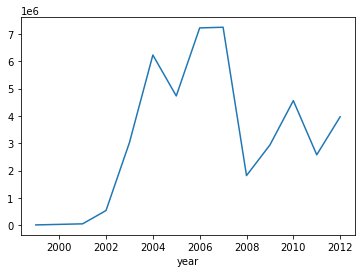

In [22]:
# Federer plateaued in 2007 (moneywise), then it got worst
df.loc[(df.win == True) & (df['tournament round'] == 'F')].groupby('year')['tournament prize money'].sum().plot()

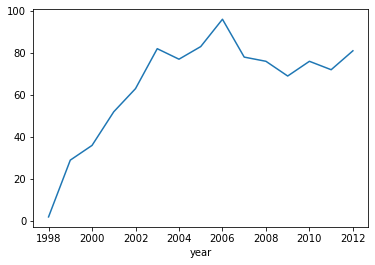

In [23]:
# Federer plateaued in 2006 (winwise), but performance stayed good
df.loc[df.win == True].groupby('year').win.count().plot()

# 5.3 Total money won

In the data, you'll find the `tournament round`, one value of which, `F` indicates the final.

Assuming Federer wins the money in the `tournament prize money` if he wins a final in a tournament, how much money has Federer made in tournaments in this dataset?

In [24]:
# Federer total amount won in finals = $44,934,964 (assuming all currency = USD)
df.loc[(df.win == True) & (df['tournament round'] == 'F')]['tournament prize money'].sum() 

44934964.0